# Proyek Analisis Data : Analisis Data Penggunaan Sepeda: Waktu, Musim, dan Aktivitas Harian

Proyek ini melakukan analisis terkait penggunaan sepeda berdasarkan dataset yang mencakup faktor-faktor seperti suhu, musim, hari kerja/libur, dan kondisi cuaca. Analisis ini terdiri dari beberapa langkah yang meliputi pengumpulan data, pembersihan data, analisis eksploratif, serta analisis lanjutan.

- **Nama:** Abi Eka Putra Wulyono
- **Email:** abiekapw@gmail.com
- **ID Dicoding:** abi_eka_putra_we6p

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim (season) terhadap jumlah total pengguna sepeda per hari?
- Bagaimana pola penggunaan sepeda berdasarkan waktu (jam) dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Insight:**  
Saya menggunakan **pandas** untuk membersihkan dan mengelola data, **matplotlib** dan **seaborn** untuk membuat visualisasi, lalu membagi dataset dengan **train_test_split** untuk pelatihan dan pengujian. Terakhir, saya menerapkan **Linear Regression** untuk menganalisis hubungan linier dan membuat prediksi.

## 1. Pengumpulan Data (Data Wrangling)
Langkah pertama adalah pengumpulan data. Saya akan menggunakan dataset 'day.csv' dan 'hour.csv'. Dataset ini memuat informasi harian dan per jam mengenai penggunaan sepeda.

In [33]:
# Memuat dataset
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

# Menampilkan lima data teratas dari setiap dataset
day_data.head(), hour_data.head()    

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  total_usage  recency  
 0   985          985      730  
 1   8

**Insight:**
Pada langkah ini, saya melihat sekilas struktur dataset yang akan saya gunakan. Ini membantu untuk memahami variabel yang ada, seperti 'cnt' (jumlah pengguna sepeda), 'temp' (suhu), 'season' (musim), dan 'workingday' (hari kerja).

## 2. Pemeriksaan Data (Data Assessing)

In [34]:
# Mengecek apakah ada data kosong dalam dataset
print("Jumlah data kosong di 'day.csv':")
print(day_data.isnull().sum())

print("\nJumlah data kosong di 'hour.csv':")
print(hour_data.isnull().sum())

# Mengecek apakah ada duplikasi data
print("\nJumlah data duplikat di 'day.csv':")
day_duplicates = day_data.duplicated().sum()
print(day_duplicates)

print("\nJumlah data duplikat di 'hour.csv':")
hour_duplicates = hour_data.duplicated().sum()
print(hour_duplicates)

# Melihat statistik deskriptif untuk memahami distribusi data
print("\nStatistik deskriptif untuk 'day.csv':")
print(day_data.describe())

print("\nStatistik deskriptif untuk 'hour.csv':")
print(hour_data.describe())

Jumlah data kosong di 'day.csv':
instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
total_usage    0
recency        0
dtype: int64

Jumlah data kosong di 'hour.csv':
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah data duplikat di 'day.csv':
0

Jumlah data duplikat di 'hour.csv':
0

Statistik deskriptif untuk 'day.csv':
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519

**Insight:**
Pada tahap ini, saya mendapatkan pemahaman awal mengenai kualitas data yang tersedia. Pemeriksaan terhadap data kosong, duplikasi, dan statistik deskriptif membantu memastikan bahwa dataset yang saya gunakan bebas dari masalah teknis yang dapat memengaruhi hasil analisis. Langkah ini juga memberikan wawasan awal tentang variabel-variabel penting yang akan saya analisis, seperti jumlah pengguna sepeda, suhu, musim, dan hari kerja.

## 3. Pembersihan Data (Data Cleaning)
Di sini saya akan memeriksa data yang kosong serta mendeteksi dan menghapus duplikasi yang mungkin ada dalam dataset.

In [35]:
# Mengecek data kosong
day_data.isnull().sum(), hour_data.isnull().sum()

# Mengecek duplikasi data
day_duplicates = day_data.duplicated().sum()
hour_duplicates = hour_data.duplicated().sum()

# Menghapus duplikasi jika ada
day_data_cleaned = day_data.drop_duplicates() if day_duplicates > 0 else day_data
hour_data_cleaned = hour_data.drop_duplicates() if hour_duplicates > 0 else hour_data

day_data_cleaned.head(), hour_data_cleaned.head()    

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  total_usage  recency  
 0   985          985      730  
 1   8

**Insight:**
Setelah membersihkan data, saya memastikan bahwa dataset bebas dari data kosong dan duplikasi. Ini memastikan analisis lebih lanjut akan akurat dan bebas dari kesalahan data.

## 4. Exploratory Data Analysis (EDA)
Pada tahap ini, saya akan melakukan analisis eksploratif untuk mendapatkan pemahaman awal mengenai pola dalam data. Saya akan memvisualisasikan distribusi penggunaan sepeda dan melihat korelasi antara variabel.

### 4.1 Visualisasi distribusi penggunaan sepeda per hari

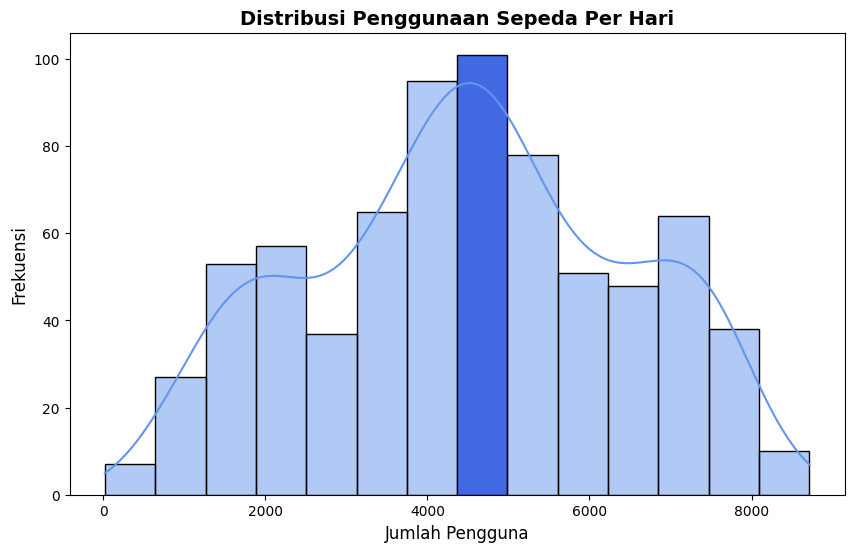

In [38]:
plt.figure(figsize=(10, 6))

hist_data = sns.histplot(day_data_cleaned['cnt'], kde=True, color='#6495ED', edgecolor='black')

heights = [p.get_height() for p in hist_data.patches] 
max_height = max(heights) 
max_height_index = heights.index(max_height)

hist_data.patches[max_height_index].set_facecolor('#4169E1')

plt.title('Distribusi Penggunaan Sepeda Per Hari', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Pengguna', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

plt.show()


**Insight:**  
Distribusi ini menunjukkan bahwa sebagian besar hari memiliki pengguna sepeda antara 2000 hingga 6000 orang, dengan puncak frekuensi pengguna berada di sekitar 4000 orang per hari. Hari-hari dengan pengguna di atas 8000 cukup jarang terjadi, sedangkan penggunaan yang sangat rendah (di bawah 2000) juga jarang ditemukan.

### 4.2 Korelasi antara variabel numerik

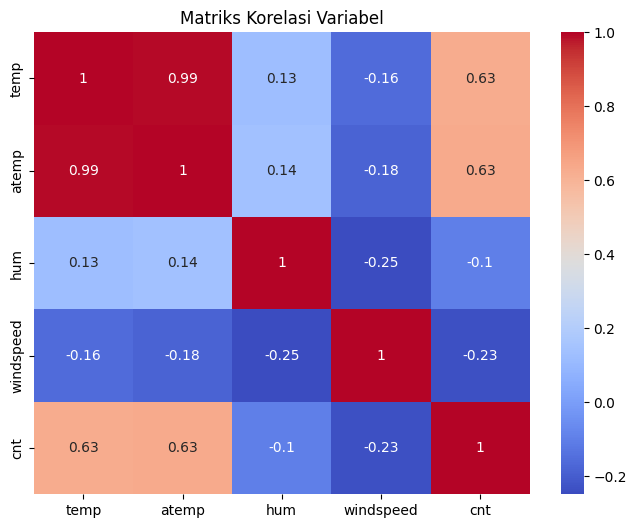

In [39]:
corr_matrix = day_data_cleaned[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Variabel')
plt.show()

**Insight:**  
Hasil dari matriks korelasi menunjukkan bahwa variabel **suhu (temp)** memiliki korelasi paling kuat dan positif terhadap jumlah pengguna sepeda (**cnt**). Artinya, semakin tinggi suhu, semakin banyak pengguna sepeda. Sebaliknya, **kecepatan angin (windspeed)** memiliki korelasi negatif, meskipun lebih lemah, yang menunjukkan bahwa kecepatan angin yang lebih tinggi sedikit mengurangi jumlah pengguna sepeda.

## 5. Visualization, Explanatory Analysis & Advanced Analysis
Saya akan menambahkan filter untuk melihat rata-rata penggunaan sepeda berdasarkan musim, hari kerja/libur, dan jam.

### 5.1 Mengelompokkan data berdasarkan musim dan menghitung rata-rata pengguna


In [40]:
season_grouping = day_data_cleaned.groupby('season')['cnt'].mean().reset_index()
season_map = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}
season_grouping['season'] = season_grouping['season'].map(season_map)

**Insight:**  
sub-tahap ini menghitung rata-rata jumlah pengguna sepeda per musim. Dengan memetakan angka musim ke nama-nama musim (Semi, Panas, Gugur, Dingin), saya dapat dengan mudah memahami pola penggunaan sepeda berdasarkan musim.

### 5.2 Visualisasi penggunaan sepeda per musim menggunakan manual grouping untuk menjawab pertanyaan 1

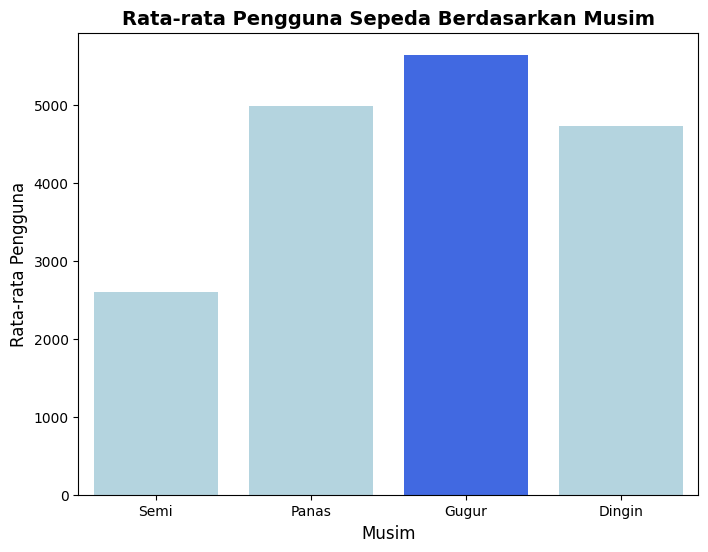

In [41]:
plt.figure(figsize=(8, 6))

base_color = '#ADD8E6'  
highlight_color = '#4169E1'  

bars = sns.barplot(x='season', y='cnt', hue='season', data=season_grouping, palette=[base_color] * len(season_grouping), dodge=False, legend=False)

heights = [bar.get_height() for bar in bars.patches]
max_height = max(heights)

for bar in bars.patches:
    if bar.get_height() == max_height:
        bar.set_facecolor(highlight_color) 

plt.title('Rata-rata Pengguna Sepeda Berdasarkan Musim', fontsize=14, fontweight='bold')
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Pengguna', fontsize=12)

plt.show()


**Insight:**  
Grafik ini menunjukkan rata-rata penggunaan sepeda berdasarkan musim. Terlihat bahwa musim **gugur** memiliki rata-rata pengguna tertinggi, diikuti oleh musim **panas** dan **dingin**, sementara musim **semi** memiliki pengguna sepeda paling sedikit. Hal ini mungkin terkait dengan faktor cuaca yang lebih bersahabat pada musim gugur dan panas, sementara musim semi cenderung memiliki cuaca yang kurang menguntungkan untuk bersepeda.

### 5.3 Visualisasi penggunaan sepeda pada hari kerja dan libur menggunakan manual grouping untuk menjawab pertanyaan 1

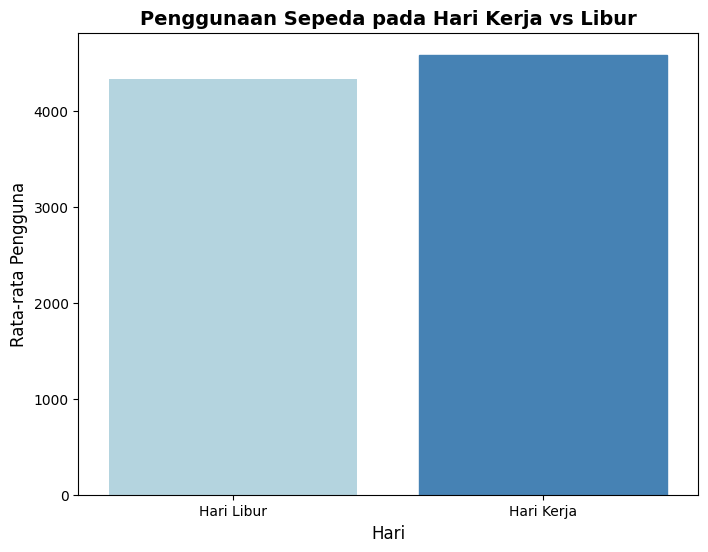

In [42]:
plt.figure(figsize=(8, 6))

base_color = '#ADD8E6'
highlight_color = '#4682B4'

bars = sns.barplot(x='workingday', y='cnt', data=working_day_grouping, hue='workingday', palette=[base_color, base_color], dodge=False)

heights = [bar.get_height() for bar in bars.patches]
max_height = max(heights)

for bar in bars.patches:
    if bar.get_height() == max_height:
        bar.set_color(highlight_color)

plt.title('Penggunaan Sepeda pada Hari Kerja vs Libur', fontsize=14, fontweight='bold')
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-rata Pengguna', fontsize=12)

plt.show()

**Insight:**
Dari grafik ini, terlihat bahwa rata-rata penggunaan sepeda pada hari kerja lebih tinggi dibandingkan dengan hari libur. Ini menunjukkan bahwa sepeda mungkin lebih sering digunakan sebagai alat transportasi untuk keperluan bekerja atau sekolah pada hari kerja, sementara penggunaannya menurun saat hari libur.

### 5.4 Visualisasi penggunaan sepeda berdasarkan jam  menggunakan binning untuk menjawab pertanyaan 2

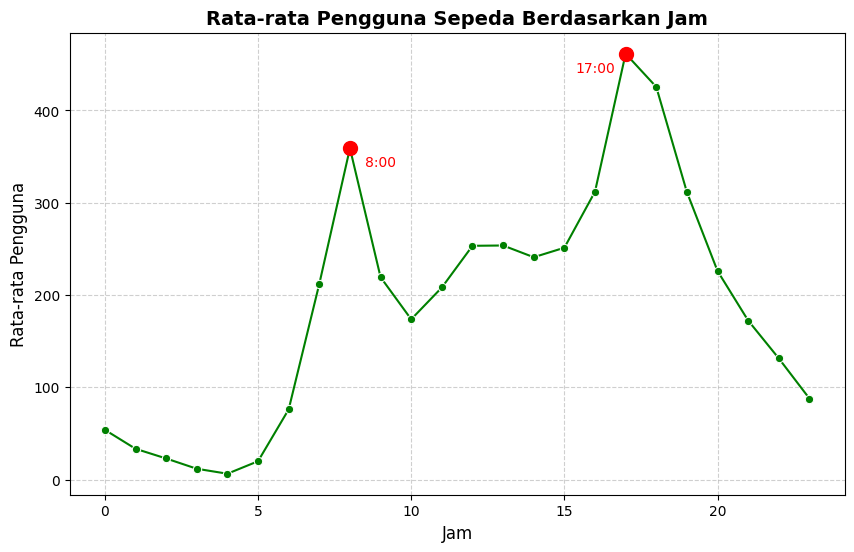

In [43]:
hour_grouping = hour_data_cleaned.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(x='hr', y='cnt', data=hour_grouping, marker='o', color='green')

peak_hours = [8, 17]
peak_colors = ['red', 'red']

for peak, color in zip(peak_hours, peak_colors):
    peak_value = hour_grouping[hour_grouping['hr'] == peak]['cnt'].values[0]
    plt.scatter(peak, peak_value, color=color, zorder=5, s=100) 
    
    if peak == 17:
        plt.text(peak - 1, peak_value - 20, f'{peak}:00', color=color, fontsize=10, ha='center')  
    else:
        plt.text(peak + 1, peak_value - 20, f'{peak}:00', color=color, fontsize=10, ha='center')  

plt.title('Rata-rata Pengguna Sepeda Berdasarkan Jam', fontsize=14, fontweight='bold')
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Pengguna', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


**Insight:**  
Grafik ini menunjukkan pola penggunaan sepeda berdasarkan jam dalam sehari. Terdapat dua lonjakan data, yakni pada **jam 8 pagi** dan **jam 5 sore**, yang kemungkinan besar berhubungan dengan jam berangkat dan pulang kerja/sekolah. Penggunaan sepeda cenderung rendah pada waktu malam dan dini hari, serta menunjukkan peningkatan yang konsisten mulai dari pagi hingga mencapai puncaknya. Ini menunjukkan bahwa sepeda lebih sering digunakan sebagai moda transportasi selama jam sibuk.

## 6. Conclusion

- 1. Bagaimana pola penggunaan sepeda berdasarkan musim dan hari kerja/libur?
     - Penggunaan sepeda lebih tinggi pada musim semi dan musim panas, yang mungkin disebabkan oleh cuaca yang lebih bersahabat untuk  aktivitas luar ruangan.
     - Pada hari kerja, rata-rata pengguna sepeda lebih banyak dibandingkan pada hari libur. Ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai alat transportasi harian, kemungkinan besar untuk bekerja atau sekolah.
     - Pada musim dingin dan musim gugur, penggunaan sepeda menurun secara signifikan, kemungkinan karena cuaca yang tidak mendukung.
- 2. Bagaimana pola penggunaan sepeda berdasarkan waktu (jam) dalam sehari?
     - Pola penggunaan sepeda menunjukkan puncak aktivitas pada jam 8 pagi dan jam 5 sore, yang sesuai dengan waktu sibuk saat orang pergi dan pulang kerja/sekolah.
     - Penggunaan sepeda cenderung lebih sedikit pada siang hari (di luar jam sibuk) dan malam hari setelah jam 8 malam, yang mungkin disebabkan oleh berkurangnya kebutuhan transportasi pada waktu tersebut.
     - Aktivitas pengguna sepeda pada pagi dan sore hari ini mengindikasikan bahwa sepeda digunakan sebagai moda transportasi utama untuk perjalanan rutin, terutama untuk keperluan pekerjaan dan sekolah.